In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
a = pd.read_csv('../../Data/accepted.csv')
a.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)

In [4]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [5]:
a = a[['fico_range_low', 'fico_range_high', 'loan_status']]
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)
a = a[['FICO', 'loan_status']]
a

,FICO,loan_status
0,677.0,Fully Paid
1,717.0,Fully Paid
2,697.0,Fully Paid
3,787.0,Current
4,697.0,Fully Paid
...,...,...
2260694,667.0,Current
2260695,697.0,Current
2260696,707.0,Current
2260697,662.0,Charged Off


In [6]:
a.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [7]:
a['loan_status'].replace({'Current':np.nan, 
                          'Late (31-120 days)':np.nan,
                          'In Grace Period':np.nan,
                          'Late (16-30 days)':np.nan,
                          'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                          'Does not meet the credit policy. Status:Charged Off':'Charged Off',
                          'Default':'Charged Off'}, inplace=True)

In [8]:
878317 + 21467 + 8436 + 4349

912569

In [9]:
1076751 + 1988

1078739

In [10]:
268559 + 761 + 40

269360

In [11]:
a['loan_status'].value_counts(dropna=False)

Fully Paid     1078739
NaN             912569
Charged Off     269360
Name: loan_status, dtype: int64

In [12]:
a = a.dropna().reset_index(drop=True)
a

,FICO,loan_status
0,677.0,Fully Paid
1,717.0,Fully Paid
2,697.0,Fully Paid
3,697.0,Fully Paid
4,692.0,Fully Paid
...,...,...
1348094,737.0,Fully Paid
1348095,707.0,Fully Paid
1348096,737.0,Charged Off
1348097,667.0,Fully Paid


In [14]:
a['loan_status'].replace({'Fully Paid':0, 
                          'Charged Off':1}, inplace=True)

In [15]:
a

,FICO,loan_status
0,677.0,0
1,717.0,0
2,697.0,0
3,697.0,0
4,692.0,0
...,...,...
1348094,737.0,0
1348095,707.0,0
1348096,737.0,1
1348097,667.0,0


In [23]:
a.describe()

,FICO,loan_status
count,1.348099e+06,1.348099e+06
mean,6.981623e+02,1.998073e-01
std,3.185111e+01,3.998555e-01
min,6.120000e+02,0.000000e+00
25%,6.720000e+02,0.000000e+00
50%,6.920000e+02,0.000000e+00
75%,7.120000e+02,0.000000e+00
max,8.475000e+02,1.000000e+00


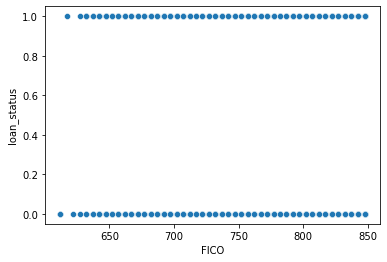

In [18]:
#It doesn't seem like FICO is a good predictor from EDA? 

sns.scatterplot(data=a, x='FICO', y='loan_status');

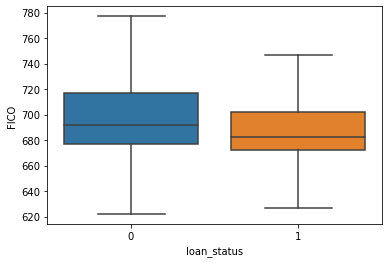

In [22]:
#It doesn't seem like FICO is a good predictor from EDA? 

sns.boxplot(data=a, x='loan_status', y='FICO', showfliers=False);